C:\Users\rhcy9\AppData\Local\Temp\ipykernel_13552\2191846859.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", period="3mo", interval="1d")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-05-20  206.625504  208.233679  204.797576  207.434583  42496600
2025-05-21  201.860901  206.805286  200.482476  204.937411  59211800
2025-05-22  201.131729  202.520153  199.473607  200.482472  46742400
2025-05-23  195.048645  197.475883  193.240699  193.450453  78432900
2025-05-27  199.983047  200.512445  197.206185  198.075209  56288500


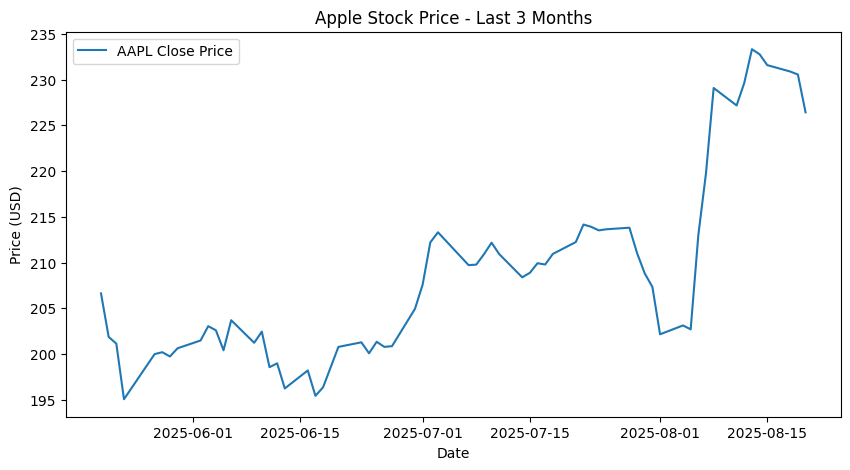

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 抓取蘋果 AAPL 最近 3 個月數據
data = yf.download("AAPL", period="3mo", interval="1d")

# 顯示前 5 筆資料
print(data.head())

# 畫股價走勢圖
plt.figure(figsize=(10,5))
plt.plot(data.index, data["Close"], label="AAPL Close Price")
plt.title("Apple Stock Price - Last 3 Months")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


C:\Users\rhcy9\AppData\Local\Temp\ipykernel_13552\3809813524.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", period="3mo", interval="1d")
[*********************100%***********************]  1 of 1 completed


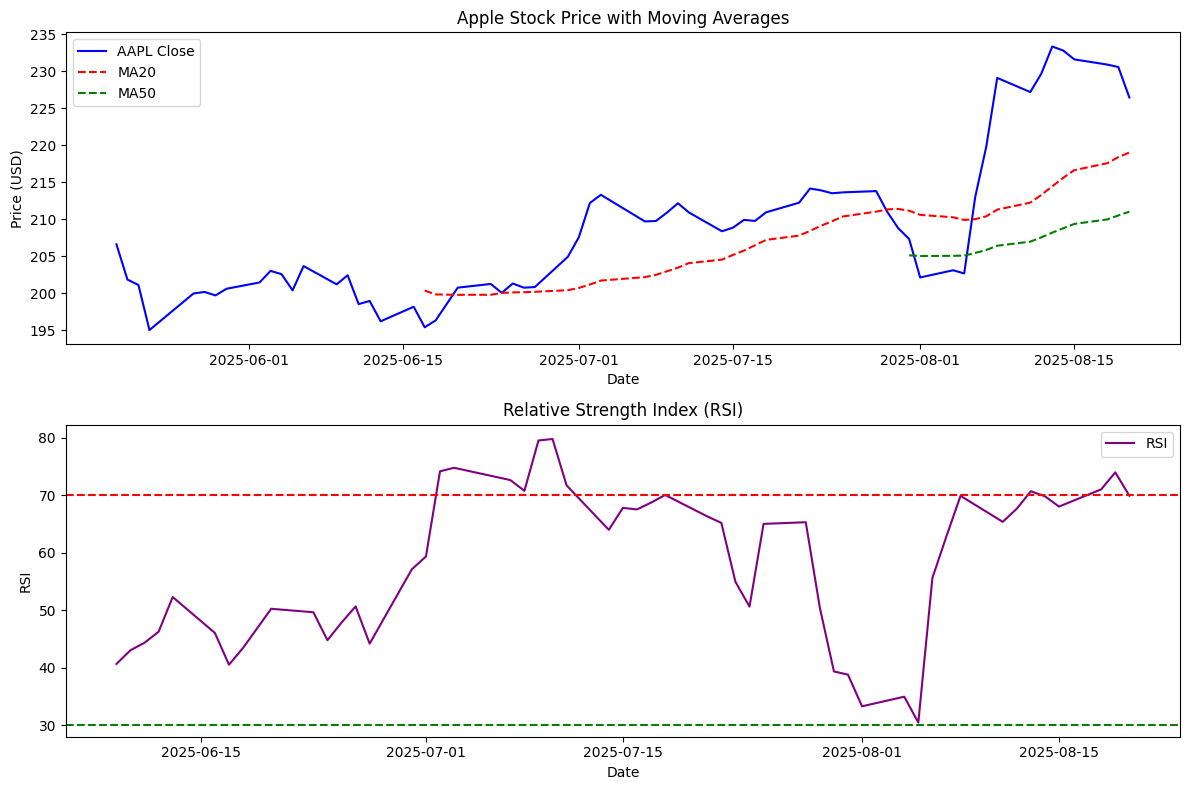

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 抓取 AAPL 最近 3 個月的股價
data = yf.download("AAPL", period="3mo", interval="1d")

# 計算技術指標
data["MA20"] = data["Close"].rolling(window=20).mean() # 20日移動平均線
data["MA50"] = data["Close"].rolling(window=50).mean() # 50日移動平均線

# RSI 指標 (14日)
delta = data["Close"].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data["RSI"] = 100 - (100 / (1 + rs))

# 畫圖
plt.figure(figsize=(12,8))

# 子圖 1: 股價 + 移動平均線
plt.subplot(2,1,1)
plt.plot(data.index, data["Close"], label="AAPL Close", color="blue")
plt.plot(data.index, data["MA20"], label="MA20", color="red", linestyle="--")
plt.plot(data.index, data["MA50"], label="MA50", color="green", linestyle="--")
plt.title("Apple Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()

# 子圖 2: RSI
plt.subplot(2,1,2)
plt.plot(data.index, data["RSI"], label="RSI", color="purple")
plt.axhline(70, color="red", linestyle="--") # 超買區
plt.axhline(30, color="green", linestyle="--") # 超賣區
plt.title("Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend()

plt.tight_layout()
plt.show()